Perkenalkan nama saya Irvandy Ilza Novendra(rendrairvandy@gmail.com)

https://www.dicoding.com/users/irvandyilzan

Berikut adalah Proyek Akhir : Klasifikasi Gambar yang saya susun untuk lulus dari kelas "Belajar Machine Learning untuk Pemula" dari Dicoding Academy.

**Akses Dataset**

Unduh file yang akan digunakan

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-25 14:20:58--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.68MB/s    in 47s     

2021-07-25 14:21:46 (6.55 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Ekstrak File ZIP

In [2]:
import zipfile                                                                   

local_zip = '/tmp/rockpaperscissors.zip'                                       
zip_ref = zipfile.ZipFile(local_zip, 'r')                                      
zip_ref.extractall('/tmp/')                                                     
zip_ref.close() 

cek bentuk file rickpaperscissor.zip

In [3]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (862 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 160837 files and directories currently install

Instal library split_folder

In [4]:
!pip install split_folders

Buat masing-masing direktori untuk setiap jenis gambar

In [5]:
import os
import shutil
import splitfolders

base_dir = '/tmp/rockpaperscissors/rps-cv-images/' #direktori utama
if ('data_model' in os.listdir(base_dir)):
  shutil.rmtree(os.path.join(base_dir, 'data_model'))

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images/',
                    output ='/tmp/rockpaperscissors/rps-cv-images/data_model',
                    seed=None, ratio=(.6,.4))

print('\n')
# BLOK ROCK
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock') #jumlah gambar rock
train_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/rock') #jumlah gambar train rock
val_rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/rock') #jumlah gambar validation rock

# BLOK PAPER
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper') #jumlah gambar paper
train_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/paper') #jumlah gambar train paper
val_paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/paper') #jumlah gambar validation paper

# BLOK SCISSORS
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors') #jumlah gambar scissor
train_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/train/scissors') #jumlah gambar train scissor
val_scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/data_model/val/scissors') #jumlah gambar validation scissor


print('\nJumlah Gambar Rock:', len(os.listdir(rock_dir)))
print('Training:', len(os.listdir(train_rock_dir)))
print('Validasi:', len(os.listdir(val_rock_dir)))

print('\n')

print('Jumlah Gambar Paper:', len(os.listdir(paper_dir)))
print('Training:', len(os.listdir(train_paper_dir)))
print('Validasi:', len(os.listdir(val_paper_dir)))

print('\n')
print('Jumlah Gambar Scissors:', len(os.listdir(scissors_dir)))
print('Training:', len(os.listdir(train_scissors_dir)))
print('Validasi:', len(os.listdir(val_scissors_dir)))

print('\n---------------------------')
print('Total Gambar:', len(os.listdir(rock_dir))+len(os.listdir(paper_dir))+ len(os.listdir(scissors_dir)))

Copying files: 2188 files [00:00, 4576.87 files/s]





Jumlah Gambar Rock: 726
Training: 435
Validasi: 291


Jumlah Gambar Paper: 712
Training: 427
Validasi: 285


Jumlah Gambar Scissors: 750
Training: 450
Validasi: 300

---------------------------
Total Gambar: 2188


Lihat bentuk data hasil split folder sebelumnya

In [6]:
!tree -d /tmp/rockpaperscissors/rps-cv-images/data_model

/tmp/rockpaperscissors/rps-cv-images/data_model
├── train
│   ├── paper
│   ├── rock
│   └── scissors
└── val
    ├── paper
    ├── rock
    └── scissors

8 directories


 **Augmentasi Gambar**

In [39]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "/tmp/rockpaperscissors/rps-cv-images/data_model/val"
validation_datagen = ImageDataGenerator(rescale = 1./255)


**Image Generator**

In [40]:
train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=8
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=8
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


**Membangun Model Jaringan Syaraf Tiruan**

Model yang digunakan adalah Model Sequential

In [41]:
model = tf.keras.models.Sequential([
    # Konvolusi Pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvolusi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil yang sudah diperoleh dalam sebuah DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

**Menggunakan Callback**

In [42]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 96%!")
      self.model.stop_training = True

callbacks = myCallback()

**Kompilasi Model**

In [43]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

**Pelatihan Model**

In [44]:
history = model.fit(
    train_generator,
    epochs=50, 
    steps_per_epoch=32,
    validation_data = validation_generator,
    validation_steps=5,
    verbose = 2,
    callbacks=[callbacks])


Epoch 1/50
32/32 - 11s - loss: 1.1672 - accuracy: 0.3203 - val_loss: 1.0879 - val_accuracy: 0.4500
Epoch 2/50
32/32 - 10s - loss: 1.0937 - accuracy: 0.3516 - val_loss: 1.0041 - val_accuracy: 0.3750
Epoch 3/50
32/32 - 10s - loss: 1.0213 - accuracy: 0.5586 - val_loss: 0.7859 - val_accuracy: 0.7250
Epoch 4/50
32/32 - 10s - loss: 0.9157 - accuracy: 0.6211 - val_loss: 0.8257 - val_accuracy: 0.6500
Epoch 5/50
32/32 - 10s - loss: 0.7745 - accuracy: 0.6484 - val_loss: 0.3301 - val_accuracy: 0.9500
Epoch 6/50
32/32 - 10s - loss: 0.7717 - accuracy: 0.6406 - val_loss: 0.3752 - val_accuracy: 0.8500
Epoch 7/50
32/32 - 10s - loss: 0.6383 - accuracy: 0.7461 - val_loss: 0.4461 - val_accuracy: 0.9250
Epoch 8/50
32/32 - 10s - loss: 0.6125 - accuracy: 0.7539 - val_loss: 0.2501 - val_accuracy: 0.9750
Epoch 9/50
32/32 - 10s - loss: 0.5484 - accuracy: 0.7891 - val_loss: 0.1684 - val_accuracy: 0.9750
Epoch 10/50
32/32 - 10s - loss: 0.3981 - accuracy: 0.8320 - val_loss: 0.4675 - val_accuracy: 0.9250
Epoch 11/

**Plot Akurasi Training dan Validasi**

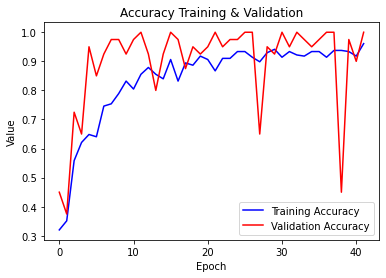

In [45]:
import matplotlib.pyplot as plt  

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

**Plot Loss Training dan Validasi**

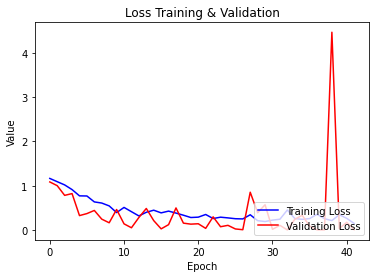

In [46]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color = 'red')
plt.title('Loss Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

**Testing Model**

Saving 65PVbRzrpzfdu8nJ.png to 65PVbRzrpzfdu8nJ.png
65PVbRzrpzfdu8nJ.png
Gambar tangan ini menunjukkan bentuk GUNTING


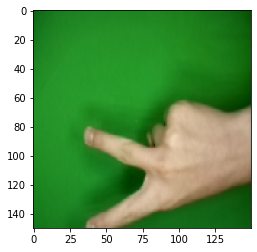

In [47]:
import numpy as np                                                                
from google.colab import files                                                    
uploaded = files.upload()                                                         

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                              
  imgplot = plt.imshow(img)                                                       
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0,0]==1:
    print('Gambar tangan ini menunjukkan bentuk KERTAS')                               
  elif classes[0,1]==1:
    print('Gambar tangan ini menunjukkan bentuk BATU')                                   
  elif classes[0,2]==1:
    print('Gambar tangan ini menunjukkan bentuk GUNTING')                                
  else:
    print('Tidak Diketahui')

Terima kasih kepada dicoding dan Indosat Ooredoo atas Program Beasiswa IDCamp 2021 sehingga saya bisa menyelesaikan proyek akhir tersebut.

Semoga kedepannya kerjasama diantara keduanya tetap terjalin untuk membuat jutaan machine learning engineer handal di Indonesia.

Irvandy Ilza Novendra (rendrairvandy@gmail.com)

https://www.dicoding.com/users/irvandyilzan

